In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import sklearn
import tensorflow as tf


root_path = os.getcwd()
parent_path = os.path.dirname(root_path)

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
## Notebook
root_directory = 'C:/git/explic-ai-tsc'    
## PC
# root_directory = 'D:/git/explic-ai-tsc'

# Custom imports
from utils.utils import read_all_datasets
from utils.utils import shape_data
from utils.constants import DATASETS_NAMES

## Load data sets

In [2]:
dataset_dict = read_all_datasets(root_directory, 'UCRArchive_2018')

datasets = ['BeetleFly', 'Earthquakes', 'ECG5000', 'ElectricDevices', 'OSULeaf']

shaped_data = { }

for dataset in datasets:
    x_train, y_train, x_test, y_test, y_true, nb_classes, input_shape = shape_data(dataset_dict[dataset])
    shaped_data[dataset] = { 
        'x_train':x_train, 
        'y_train':y_train, 
        'x_test':x_test, 
        'y_test':y_test, 
        'y_true':y_true, 
        'nb_classes':nb_classes, 
        'input_shape':input_shape
    }
    
# shaped_data['BeetleFly']

### Load pretrained data classifiers (pretrained for 2 iterations)

In [3]:
from classifiers import MLP
from classifiers import ResNet
from classifiers import InceptionTime

In [4]:
classifiers = ['MLP', 'ResNet', 'InceptionTime']

iterations = 1
models = { }

datasets_to_explain = ['ECG5000']

for iteration in range(iterations):
    for dataset in datasets_to_explain:
        input_shape = shaped_data[dataset]['input_shape']
        nb_classes = shaped_data[dataset]['nb_classes']
        
        output_directory_model = root_directory + f'/results/MLP/UCRArchive_2018_itr_{iteration}/{dataset}/'
        models[f'MLP_{iteration}_{dataset}'] = MLP(output_directory_model, input_shape, nb_classes, verbose=False, build=False)
        models[f'ResNet_{iteration}_{dataset}'] = ResNet(output_directory_model, input_shape, nb_classes, verbose=False, build=False)
        models[f'InceptionTime_{iteration}_{dataset}'] = InceptionTime(output_directory_model, input_shape, nb_classes, verbose=False, build=False)

models

dataset_to_explain = 'ECG5000'

## Explanations

In [5]:
# Imports
from explanations import OcclusionSensitivityUTS
from explanations import RiseUTS
from explanations import LimeTimeSeriesExplainer

#### Instantiate and explain data sets

In [6]:
occl_explainer = OcclusionSensitivityUTS()
lime_explainer = LimeTimeSeriesExplainer()
rise_explainer = RiseUTS()

## Compare perturbations
relevance_occl_zero = { }
relevance_occl_mean = { }
relevance_lime_zero = { }
relevance_lime_mean = { } 
relevance_rise_mask = { }

## Compare image specific to time series specifics
relevance_lime_euc_distance = { }
relevance_lime_cos_distance = { } 
relevance_lime_dtw_distance = { } 
    
relevance_rise_linear_interpolation = { } 
relevance_rise_fourier_interpolation = { }


for model in models:
    print(model, datasets_to_explain)
    x_test = shaped_data[dataset_to_explain]['x_test'][:1]
    y_true = shaped_data[dataset_to_explain]['y_true'][:1]
    
    relevance_occl_zero[model] = occl_explainer.explain(x_test, y_true, models[model])
    relevance_occl_mean[model] = occl_explainer.explain(x_test, y_true, models[model], perturbation='mean')

    relevance_lime_zero[model] = lime_explainer.explain(x_test, y_true, models[model], labels=y_true, num_samples=50)
    relevance_lime_mean[model] = lime_explainer.explain(x_test, y_true, models[model], labels=y_true, perturbation='mean', num_samples=50)

    relevance_lime_euc_distance[model] = relevance_lime_zero[model]
    relevance_lime_cos_distance[model] = lime_explainer.explain(x_test, y_true, models[model], labels=y_true, num_samples=50, distance_metric='cosine')
    relevance_lime_dtw_distance[model] = lime_explainer.explain(x_test, y_true, models[model], labels=y_true, num_samples=50, distance_metric='dtw')
    
    
    relevance_rise_mask[model]=rise_explainer.explain(x_test, y_true, models[model], batch_size=10)        
    
    relevance_rise_linear_interpolation[model] = relevance_rise_mask[model]
    relevance_rise_fourier_interpolation[model] = rise_explainer.explain(x_test, y_true, models[model], batch_size=10, interpolation='fourier')        
        

MLP_0_ECG5000 ['ECG5000']


ResNet_0_ECG5000 ['ECG5000']
InceptionTime_0_ECG5000 ['ECG5000']


In [7]:
relevance_rise_mask

{'MLP_0_ECG5000': array([[0.98136405, 0.97686596, 0.97236787, 0.96786979, 0.9633717 ,
         0.95887361, 0.95437552, 0.94815334, 0.94155935, 0.93242385,
         0.92287442, 0.91604559, 0.90893641, 0.90020121, 0.8932154 ,
         0.8875244 , 0.88268428, 0.87944978, 0.8767582 , 0.87735563,
         0.87926599, 0.88204271, 0.88563435, 0.89035517, 0.8961578 ,
         0.90196043, 0.90776306, 0.91356569, 0.91936832, 0.92517095,
         0.93313155, 0.94233623, 0.95192154, 0.9604857 , 0.96937469,
         0.97982496, 0.99104895, 1.00189539, 1.00971248, 1.01826116,
         1.02660986, 1.03285389, 1.03885735, 1.04311131, 1.0490849 ,
         1.05338565, 1.05526479, 1.05582337, 1.05638194, 1.05694052,
         1.0574991 , 1.05805768, 1.05861626, 1.05917933, 1.05955354,
         1.06017304, 1.06167311, 1.06140834, 1.05905797, 1.05505463,
         1.04987396, 1.04642384, 1.0384921 , 1.03200871, 1.02741924,
         1.02099839, 1.01588996, 1.00904697, 1.00287097, 0.99777122,
         0.992506

## Evaluation - Results

In [8]:
from utils.utils import plot_relevance
# from evaluations import PerturbationAnalysisUTS
# evaluator = PerturbationAnalysisUTS()

x_test_explained = shaped_data[dataset_to_explain]['x_test'][:10]

***Disclaimer:*** *The following evaluation is currently provided in a qualitative (visual) manner. The reason for that is that all explantions are currently computed for different settings (perturbation, patch_sizes, batch_size, ...)*

### Comparison: perturbations (same data set, same model)

The most obvious hyperparamters for perturbation based methods are the perturbation operator. Perturbations can be applied via constant values (zero, mean) at a certain point or for masks via noise injection.

*Which interpolation methods yield the best explanatory abilities?*

Compared methods: Occlusion (zero, mean), LIME euclidean (zero, mean), RISE linear (random noise, zero)

Occlusion zero (MLP)


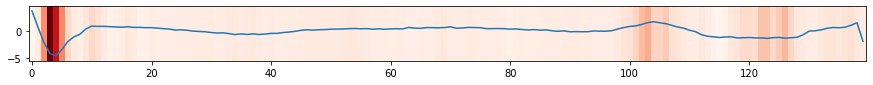

Occlusion mean (MLP)


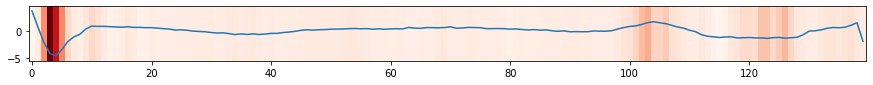

LIME euclidean zero (MLP)


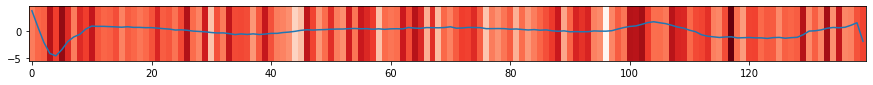

LIME euclidean mean (MLP)


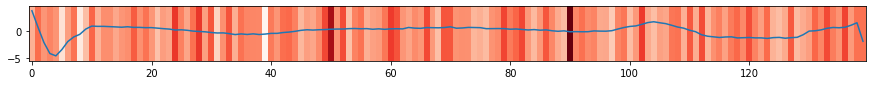

RISE linear (MLP)


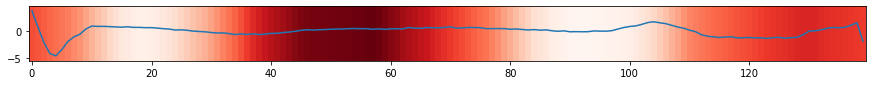

In [9]:
print('Occlusion zero (MLP)')
plot_relevance(x_test_explained[0], relevance_occl_zero['MLP_0_ECG5000'][0])

print('Occlusion mean (MLP)')
plot_relevance(x_test_explained[0], relevance_occl_mean['MLP_0_ECG5000'][0])

print('LIME euclidean zero (MLP)')
plot_relevance(x_test_explained[0], relevance_lime_zero['MLP_0_ECG5000'][0])

print('LIME euclidean mean (MLP)')
plot_relevance(x_test_explained[0], relevance_lime_mean['MLP_0_ECG5000'][0])

print('RISE linear (MLP)')
plot_relevance(x_test_explained[0], relevance_rise_mask['MLP_0_ECG5000'][0])

Occlusion zero: MLP, ResNet, InceptionTime


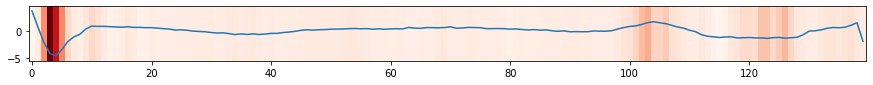

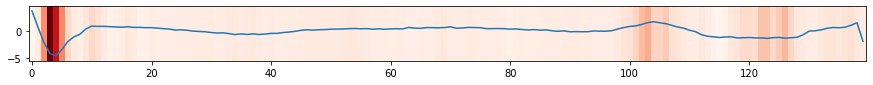

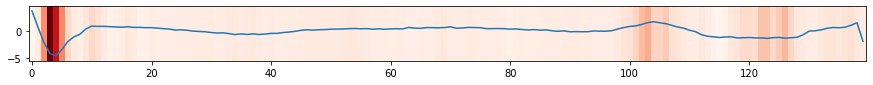

Occlusion mean: MLP, ResNet, InceptionTime


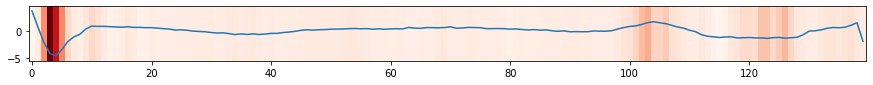

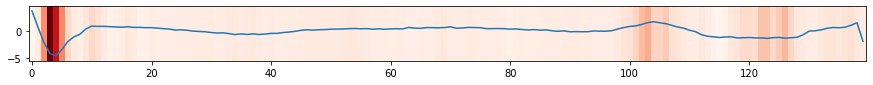

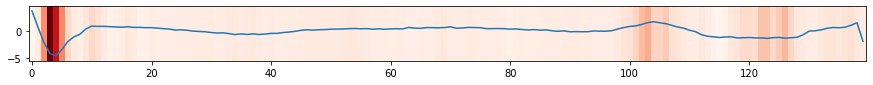

LIME euclidean zero: MLP, ResNet, InceptionTime


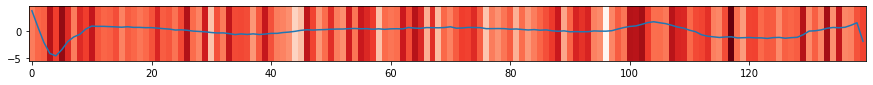

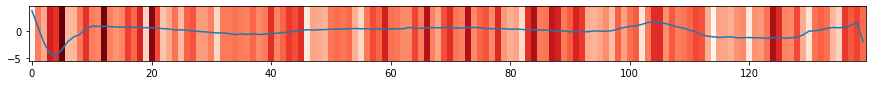

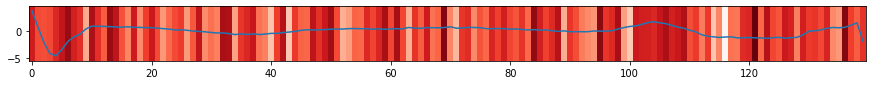

LIME euclidean mean: MLP, ResNet, InceptionTime


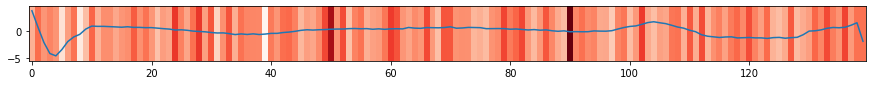

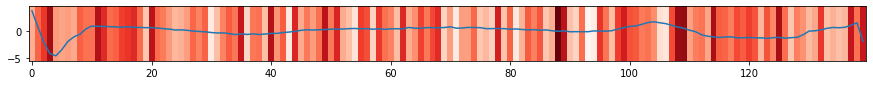

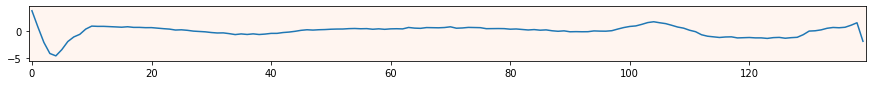

RISE linear: MLP, ResNet, InceptionTime


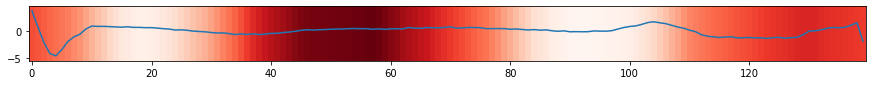

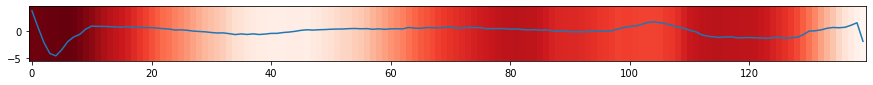

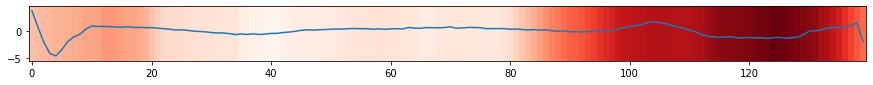

In [10]:
print('Occlusion zero: MLP, ResNet, InceptionTime')
plot_relevance(x_test_explained[0], relevance_occl_zero['MLP_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_occl_zero['ResNet_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_occl_zero['InceptionTime_0_ECG5000'][0])

print('Occlusion mean: MLP, ResNet, InceptionTime')
plot_relevance(x_test_explained[0], relevance_occl_mean['MLP_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_occl_mean['ResNet_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_occl_mean['InceptionTime_0_ECG5000'][0])

print('LIME euclidean zero: MLP, ResNet, InceptionTime')
plot_relevance(x_test_explained[0], relevance_lime_zero['MLP_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_lime_zero['ResNet_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_lime_zero['InceptionTime_0_ECG5000'][0])

print('LIME euclidean mean: MLP, ResNet, InceptionTime')
plot_relevance(x_test_explained[0], relevance_lime_mean['MLP_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_lime_mean['ResNet_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_lime_mean['InceptionTime_0_ECG5000'][0])

print('RISE linear: MLP, ResNet, InceptionTime')
plot_relevance(x_test_explained[0], relevance_rise_mask['MLP_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_rise_mask['ResNet_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_rise_mask['InceptionTime_0_ECG5000'][0])

### Comparison: Lime Image specific Distance to Lime Time Series specific Distance

**Image specific distance metric:** Base LIME uses euclidean distance

**Time Series specific distance metric:** Interpolation best suited for Time Series is fourier interpolation (assuming the time series is periodic)

*Which methods yield the best explanatory abilities?*

Compared methods: LIME euclidean, LIME cosine, LIME dynamic time warping

LIME euclidean (MLP)


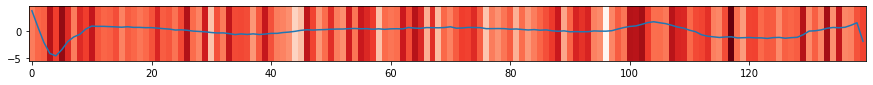

LIME cosine (MLP)


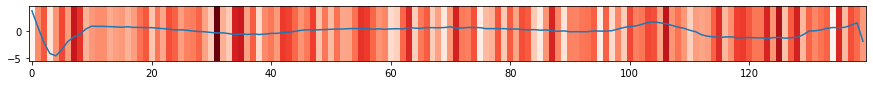

LIME dynamic time warping (MLP)


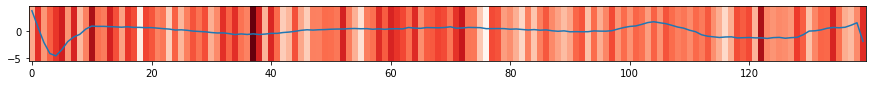

In [11]:
print('LIME euclidean (MLP)')
plot_relevance(x_test_explained[0], relevance_lime_euc_distance['MLP_0_ECG5000'][0])

print('LIME cosine (MLP)')
plot_relevance(x_test_explained[0], relevance_lime_cos_distance['MLP_0_ECG5000'][0])

print('LIME dynamic time warping (MLP)')
plot_relevance(x_test_explained[0], relevance_lime_dtw_distance['MLP_0_ECG5000'][0])

LIME euclidean: MLP, ResNet, InceptionTime


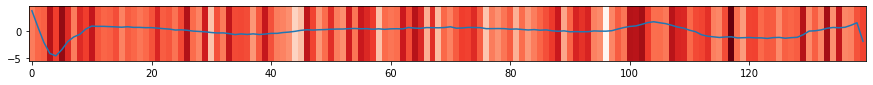

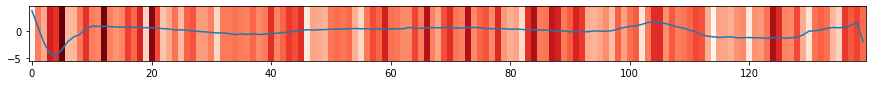

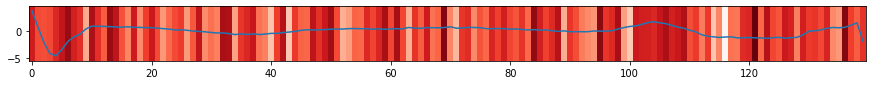

LIME cosine: MLP, ResNet, InceptionTime


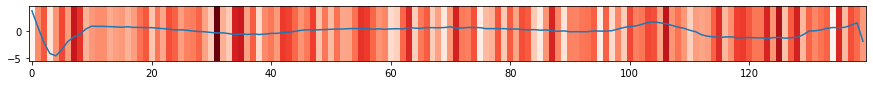

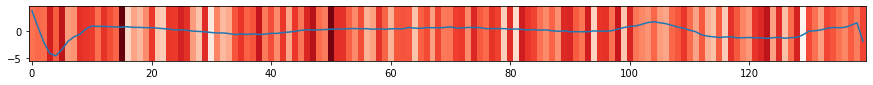

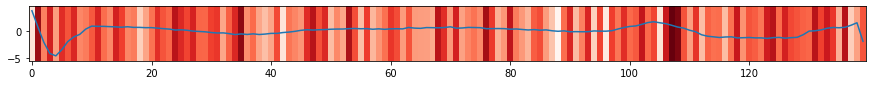

LIME dynamic time warping: MLP, ResNet, InceptionTime


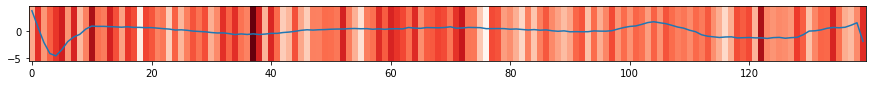

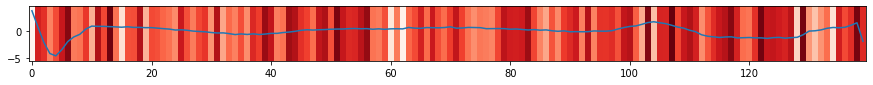

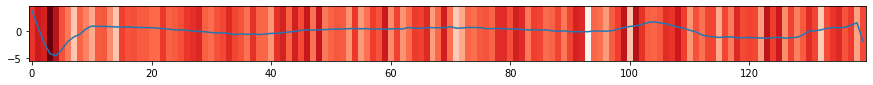

In [12]:
print('LIME euclidean: MLP, ResNet, InceptionTime')
plot_relevance(x_test_explained[0], relevance_lime_euc_distance['MLP_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_lime_euc_distance['ResNet_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_lime_euc_distance['InceptionTime_0_ECG5000'][0])

print('LIME cosine: MLP, ResNet, InceptionTime')
plot_relevance(x_test_explained[0], relevance_lime_cos_distance['MLP_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_lime_cos_distance['ResNet_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_lime_cos_distance['InceptionTime_0_ECG5000'][0])

print('LIME dynamic time warping: MLP, ResNet, InceptionTime')
plot_relevance(x_test_explained[0], relevance_lime_dtw_distance['MLP_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_lime_dtw_distance['ResNet_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_lime_dtw_distance['InceptionTime_0_ECG5000'][0])

### Comparison: RISE Image specific interpolation to RISE Time Series specific interpolation

**Image specific interoplation:** Base RISE uses (bi-)linear interpolation

**Time Series specific interoplation:** Interpolation best suited for Time Series is fourier interpolation (assuming the time series is periodic)

*Which methods yield the best explanatory abilities?*

Compared methods: RISE linear, RISE fourier



Notes: Specifically compare results of periodic time series to non-periodic time series (if suitable periodicity test found)

RISE linear (MLP)


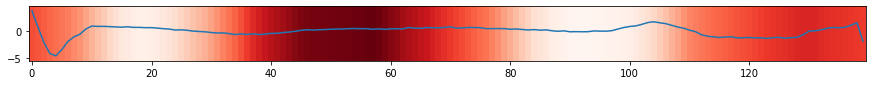

RISE fourier (MLP)


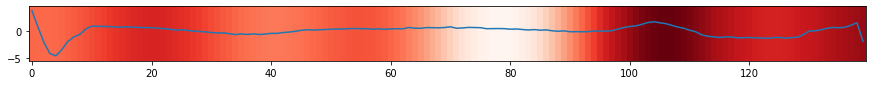

In [13]:
print('RISE linear (MLP)')
plot_relevance(x_test_explained[0], relevance_rise_linear_interpolation['MLP_0_ECG5000'][0])

print('RISE fourier (MLP)')
plot_relevance(x_test_explained[0], relevance_rise_fourier_interpolation['MLP_0_ECG5000'][0])

RISE linear: MLP, ResNet, InceptionTime


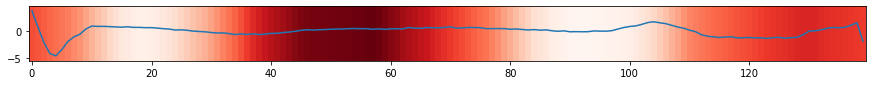

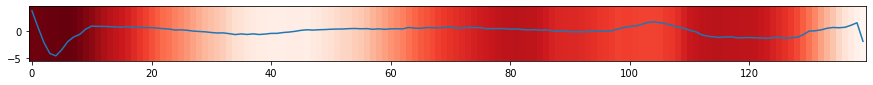

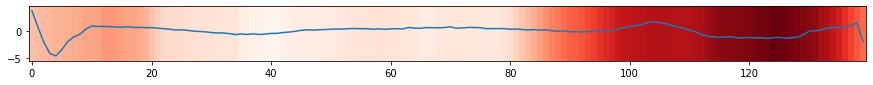

RISE fourier: MLP, ResNet, InceptionTime


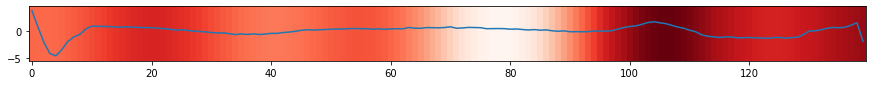

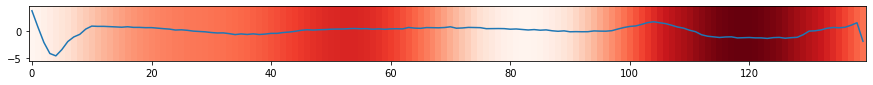

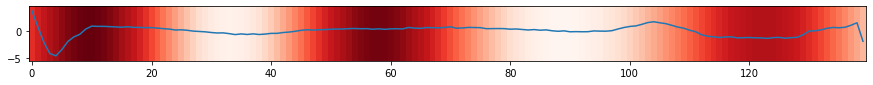

In [14]:
print('RISE linear: MLP, ResNet, InceptionTime')
plot_relevance(x_test_explained[0], relevance_rise_linear_interpolation['MLP_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_rise_linear_interpolation['ResNet_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_rise_linear_interpolation['InceptionTime_0_ECG5000'][0])

print('RISE fourier: MLP, ResNet, InceptionTime')
plot_relevance(x_test_explained[0], relevance_rise_fourier_interpolation['MLP_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_rise_fourier_interpolation['ResNet_0_ECG5000'][0])
plot_relevance(x_test_explained[0], relevance_rise_fourier_interpolation['InceptionTime_0_ECG5000'][0])

### Comparison: How do results for different patch_sizes differ?

*Currently in computation -> Only Occlusion compared*

Patch_size 1


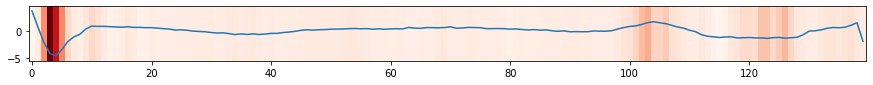

Patch_size 2


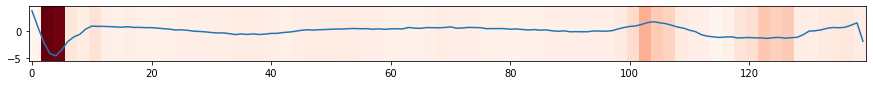

Patch_size 3


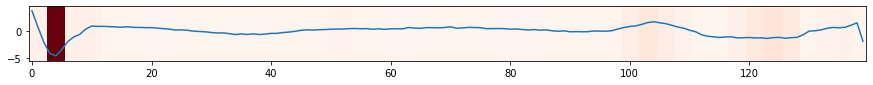

Patch_size 4


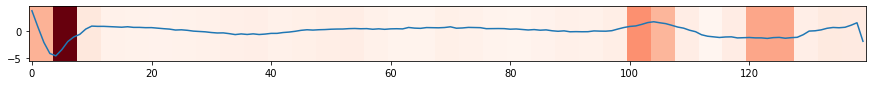

Patch_size 5


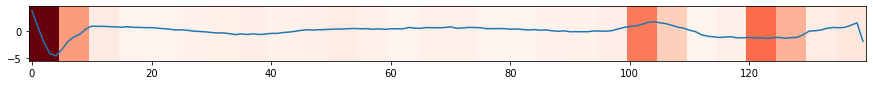

Patch_size 6


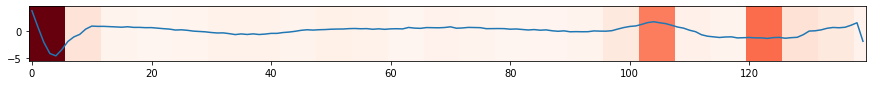

Patch_size 7


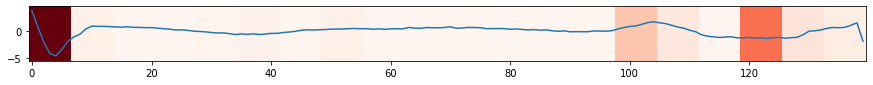

Patch_size 8


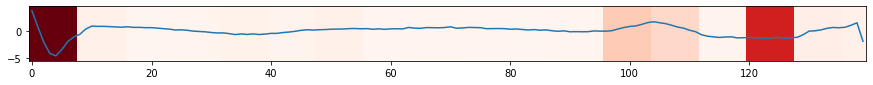

Patch_size 9


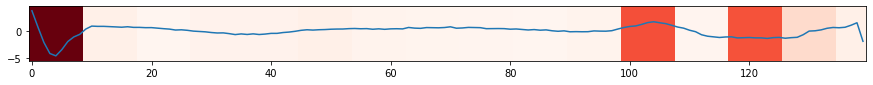

In [21]:
x_test = shaped_data[dataset_to_explain]['x_test'][0]
y_true = shaped_data[dataset_to_explain]['y_true'][0]

patch_size = round(x_test.shape[0] / 100) 
patch_sizes = [patch_size, patch_size*2, patch_size*3, patch_size*4, patch_size*5, patch_size*6, patch_size*7, patch_size*8, patch_size*9] # arbitrarily picked for here

for patch_s in patch_sizes:
    relevance = occl_explainer.explain_instance(x_test, y_true, models[model], patch_size=patch_s)
    print('Patch_size', patch_s)
    plot_relevance(x_test, relevance)